In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

First, we need to access the appropriate data.

In [2]:
df = pd.read_csv("data/GlobalLandTemperaturesByCountry.csv")
df

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
0,1743-11-01,4.384,2.294,Åland
1,1743-12-01,NaN,NaN,Åland
2,1744-01-01,NaN,NaN,Åland
3,1744-02-01,NaN,NaN,Åland
4,1744-03-01,NaN,NaN,Åland
...,...,...,...,...
577457,2013-05-01,19.059,1.022,Zimbabwe
577458,2013-06-01,17.613,0.473,Zimbabwe
577459,2013-07-01,17.000,0.453,Zimbabwe
577460,2013-08-01,19.759,0.717,Zimbabwe


For this project, let's focus on just 3 countries: the United States, China and Russia. We will modify our DataFrame accordingly.

In [3]:
nations = ["United States",
           "China",
           "Russia"]

In [4]:
countries = df.groupby("Country").mean(numeric_only=True)
countries = countries.loc[nations]
countries

,AverageTemperature,AverageTemperatureUncertainty
Country,,
United States,8.603573,0.831177
China,6.612731,0.633758
Russia,-5.521882,1.069025


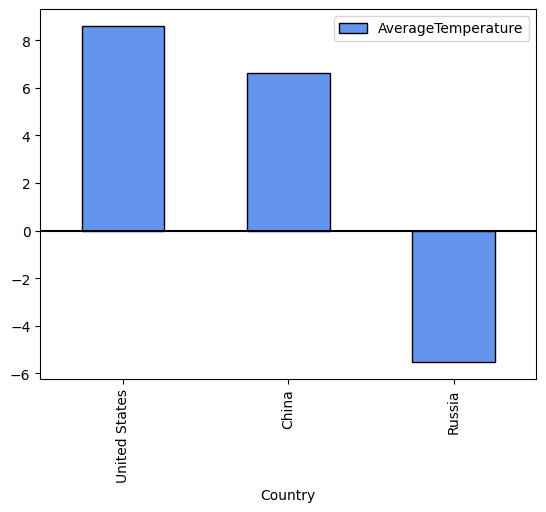

In [5]:
countries.plot(kind="bar", y="AverageTemperature", edgecolor="black", color="cornflowerblue")
plt.hlines(0, xmin=-1, xmax=8, color="black")

In the above bar graph, we can see that, on average, the United States has the highest temperature, and Russia has the lowest temperature. However, this tells us little about climate change itself, so let's analyze the change in temperature over time.

Text(0, 0.5, 'Temperature (°C)')

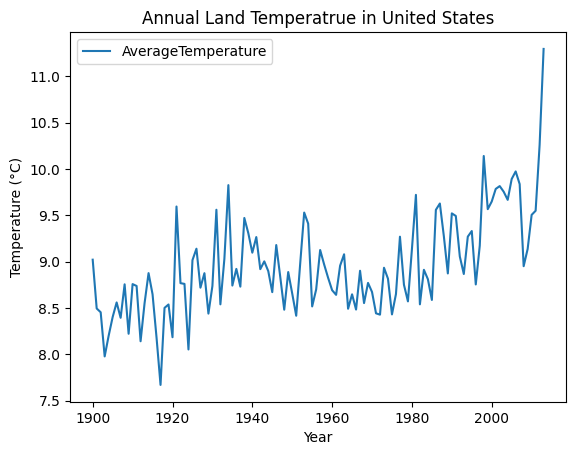

In [6]:
country = nations[0]

df_country = df.loc[df["Country"] == country].copy()
df_country["dt"] = pd.to_datetime(df_country["dt"]) # converting to datetime to simplify next line's year access
df_country = df_country.assign(year=df_country["dt"].dt.year)
df_country = df_country.groupby("year").mean(numeric_only=True)
df_country = df_country[df_country.index >= 1900]

df_country.plot(y="AverageTemperature")
plt.title("Annual Land Temperatrue in " + country)
plt.xlabel("Year")
plt.ylabel("Temperature (°C)")

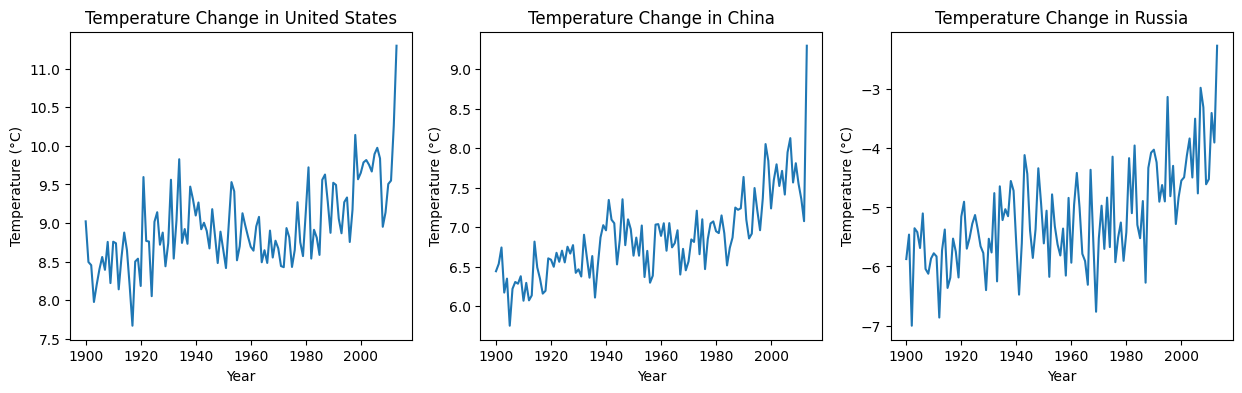

In [7]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 4))

for i, country in enumerate(nations):
    df_country = df.loc[df["Country"] == country].copy()
    df_country["dt"] = pd.to_datetime(df_country["dt"]) # converting to datetime to simplify next line's year access
    df_country = df_country.assign(year=df_country["dt"].dt.year)
    df_country = df_country.groupby("year").mean(numeric_only=True)
    df_country = df_country[df_country.index >= 1900]

    ax[i].plot(df_country.index, df_country["AverageTemperature"])
    ax[i].set_title("Temperature Change in " + country)
    ax[i].set_xlabel("Year")
    ax[i].set_ylabel("Temperature (°C)")

plt.show()

We can observe the ranges here are largely similar, so it would be better to place these all one one chart.

<AxesSubplot: xlabel='year', ylabel='AverageTemperature'>

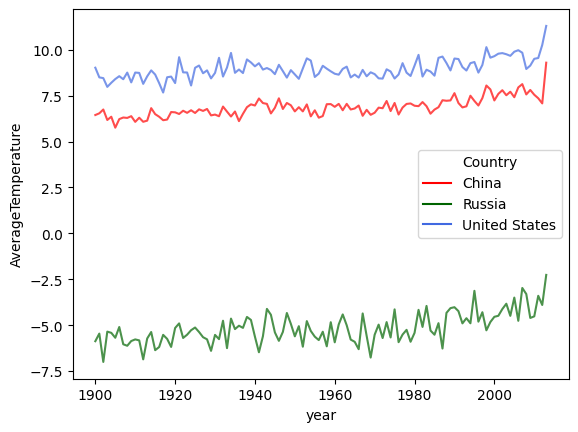

In [8]:
df_all = pd.concat([df.loc[df["Country"] == country] for country in nations])

df_all["dt"] = pd.to_datetime(df_all["dt"])
df_all["year"] = df_all["dt"].dt.year
df_all = df_all[df_all["year"] >= 1900]

df_all = df_all.groupby(["Country", "year"], as_index=False)["AverageTemperature"].mean()

sns.lineplot(x="year", y="AverageTemperature", hue="Country", data=df_all, alpha=0.7,
            palette={"United States": "royalblue", "China": "red", "Russia": "darkgreen"}) # for consistency with next chart

Unfortuntately, while the ranges are similar, the start and end points for each country are not the same, making this chart essentially useless. Let's place them on the same chart instead, but plot the change from 1900, so that each curve starts from 0 and the change is the variable observed.

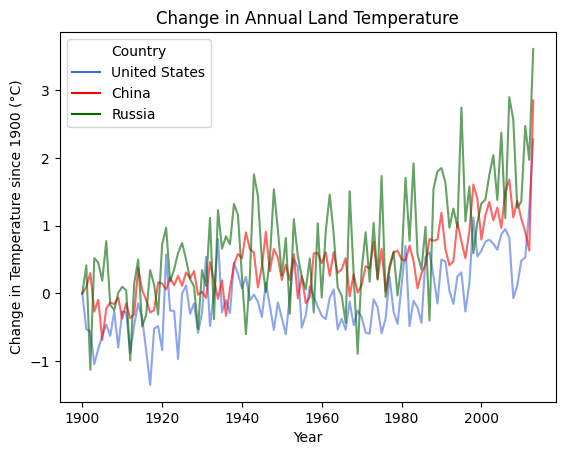

In [9]:
all_nations = []
for country in nations:
    df_country = df.loc[df["Country"] == country].copy()
    df_country["dt"] = pd.to_datetime(df_country["dt"])
    df_country = df_country.assign(year=df_country["dt"].dt.year)
    df_country = df_country.groupby("year").mean(numeric_only=True)
    df_country = df_country[df_country.index >= 1900]

    df_country["AverageDifference"] = df_country["AverageTemperature"] - df_country.loc[1900, "AverageTemperature"]
    df_country["Country"] = country
    all_nations.append(df_country)

df_all = pd.concat(all_nations)

sns.lineplot(data=df_all, x="year", y="AverageDifference", hue="Country", alpha=0.6,
             palette={"United States": "royalblue", "China": "red", "Russia": "darkgreen"}) # for consistency with last chart
plt.title("Change in Annual Land Temperature")
plt.xlabel("Year")
plt.ylabel("Change in Temperature since 1900 (°C)")
plt.show()

Here, we can see that the United States curve tends to be lowest, while Russia's tends to be highest. There are a few possible reasons for this. It is possible that American industrialization is not as big of a factor here since it began long before 1900, while the other two nations famously industrialized during the 20th century. Other factors worth noting include population, industries, and government response.